### Lab 2 - Classification
Matthew Alisangco, Jed Hughes, Chris Dong

## Read data

In [1]:
#  read_table "ISO-8859-1'"
import numpy as np
import pandas as pd

#tweets = pd.read_table('Lab1/clinton_trump_tweets.txt')
#Name, ScreenName, UserID, FollowersCount, FriendsCount, Location, Description, CreatedAt, StatusID, Language, Place, RetweetCount, FavoriteCount, Text

user_cols = ['Name', 'ScreenName', 'UserID', 'FollowersCount', 'FriendsCount', 'Location', 'Description', 'CreatedAt', 'StatusID', 'Language', 'Place', 'RetweetCount', 'FavoriteCount', 'Text']
tweets = pd.read_table('clinton_trump_tweets.txt', encoding ="ISO-8859-1", dtype=str, names= user_cols)

tweets.head(10)

,Name,ScreenName,UserID,FollowersCount,FriendsCount,Location,Description,CreatedAt,StatusID,Language,Place,RetweetCount,FavoriteCount,Text
0,Cebel,Cebel6,1519696717,132,263,"Little Rock, Arkansas",Arkansas Razorback Fan Just trying to be #Unco...,Sat Oct 29 08:10:06 EEST 2016,792232017094119425,en,null,0,1,@NWAJimmy I've read it now though brother. Was...
1,Cookie,Cookiemuffen,109945090,2154,2034,The American South,Got married after college. I don't regret star...,Wed Oct 26 18:44:08 EEST 2016,791304413923213312,en,null,1937,0,RT @wikileaks: New poll puts Pirate Party on c...
2,nolaguy,nolaguy_phd,1450086582,797,1188,NaN,"An LSU Ph.D student living in New Orleans, try...",Sat Oct 29 21:53:29 EEST 2016,792439227090767872,en,null,0,0,@gaystoner821 I think New Orleans spoiled me w...
3,Mark Hager,marksnark,167177185,204,448,Pittsburgh,"Hip, trendy, smart, funny, fit, lobbyist. U? B...",Wed Oct 26 00:33:20 EEST 2016,791029904733331457,en,null,891,0,RT @LOLGOP: ACA needs fixes but know da facts:...
4,Capitalist Creations,aaronjhoddinott,1191022351,775,154,Canada,"Entrepreneur, startup investor, political junk...",Fri Oct 28 05:05:10 EEST 2016,791823089700962304,en,null,7,0,RT @FastCompany: Alphabet shares soar on bette...
5,Josh,BigPapiCarnivor,154393802,646,2985,NaN,"Embrace the feel, induce the euphoria, and jus...",Sat Oct 29 02:34:44 EEST 2016,792147620986839040,en,null,51,0,RT @Pattric: That one follower who tweet you e...
6,David Walling,davidjwalling,106568768,975,2781,"Dallas, TX",Bloodletting secure algorithms close to the bo...,Sat Oct 29 00:16:48 EEST 2016,792112907488079872,en,null,0,0,#infosec #Intel #ACM #IEEE Impacts Haswell mi...
7,robert2266,robert2266,17101060,845,938,The Universe,The Dark Lord,Fri Oct 28 14:41:06 EEST 2016,791968028191711237,en,null,0,0,Hacked e-mails show Clinton campaigns fears ab...
8,Brianna N. Love,Brianna__Loves,17352518,803,1280,#thesea,green blogger|Swells'19 architecture and geosc...,Fri Oct 28 07:32:18 EEST 2016,791860117671124992,en,null,24,0,RT @africaarguments: This year's seen some rem...
9,Polly Ticks,PTicks,2352007196,1422,863,everywhere and nowhere,"a girl interested in the political world, like...",Fri Oct 28 19:01:13 EEST 2016,792033486970454020,en,null,3,0,"RT @HalifaxEditor: Some 40 years later, @HfxRe..."


## Clean data
Remove all Retweets, Remove all users that have Less than 20 tweets

In [2]:
tweetsNoRT = tweets[~tweets.Text.str.startswith('RT')]

tweetsNoRT.head()
#Comments -> {Classifier} -> positive or negative?

#tweetsNoRT[UserID.isin(ids[UserID.duplicated()])].sort("UserID")
#Groupby usersid with tweets('texts') > 20"        
df_userids_largetweets = pd.concat(g for _, g in tweetsNoRT.groupby("UserID") if len(g) > 20)

#type(df_userids_largetweets)
#df_userids_largetweets.head()
#print(df_userids_largetweets['UserID'].unique())



In [3]:
type(df_userids_largetweets)
#print(df_userids_largetweets.head())

pandas.core.frame.DataFrame

In [4]:
df_userids_largetweets = pd.concat(g for _, g in tweetsNoRT.groupby("UserID") if len(g) > 20)
handle = '(@[a-zA-z0-9]+)'
hashtag = '(#[a-zA-z0-9]+)'
hashHandle = r'((@|#)([a-zA-Z0-9]+))'

df_tweets = pd.DataFrame()

df_tweets['UserID'] = df_userids_largetweets.UserID
df_userids_largetweets['Handles'] = df_userids_largetweets['Text'].str.findall(handle).apply(' '.join)
df_userids_largetweets['Hashtags'] = df_userids_largetweets['Text'].str.findall(hashtag).apply(' '.join)

df_tweets['Hashtags_Handles'] = df_userids_largetweets['Hashtags'] + df_userids_largetweets['Handles']

df_tweets

,UserID,Hashtags_Handles
64941,1000073790,
418791,1000073790,#gobirds@nickdougherty_
460312,1000073790,
485386,1000073790,
496665,1000073790,#TrustTheProcess@JoelEmbiid
969626,1000073790,
1061852,1000073790,@ROCCDUB1
1535586,1000073790,@youdontknobo
1664593,1000073790,
1744702,1000073790,


In [5]:
df_tweets = df_tweets.groupby('UserID').agg({'Hashtags_Handles': lambda x: ' '.join(x)})
df_tweets = df_tweets[df_tweets['Hashtags_Handles'].str.len() > 19]

df_tweets

,Hashtags_Handles
UserID,
1000073790,#gobirds@nickdougherty_ #TrustTheProcess@Jo...
100007440,@Johnubacon @seangriffey @jbouie @MotherJones ...
100025240,@cnnbrk @cnnbrk @cnnbrk @megynkelly @newtgingr...
1000336892,@MikeMarchant ...
100040004,@FunkhouserZach @zackjlawrence @zackjlawr...
1000532371,@sharethis @sharethis @darkhorsenews #8217 #8...
100091223,#KingTut@KevinHart4real @trtworld @BarackOb...
100091969,@The_Rizzer @capebreton1973 @tonyaevinger @Yan...
1000981428,#plussize #...


In [6]:
import sklearn.feature_extraction.text as sk_text

Text_Vect = df_tweets['Hashtags_Handles'];

vectorizer = sk_text.CountVectorizer(min_df=1, max_features = 50)
#vectorizer = sk_text.CountVectorizer(min_df=1, stop_words = 'english')

Text_matrix = vectorizer.fit_transform(Text_Vect)

#  convert it to numpy array

#print(vectorizer.get_feature_names())

df_text = pd.DataFrame(Text_matrix.todense(), index=Text_Vect.index, columns=vectorizer.get_feature_names())

#df_hash["Hashtag_Count"] = df_hash.sum(axis = 1)

In [9]:
df_text['UserID'] = df_text.index
df_text 

,abc,album,breitbartnews,business,clinton,cnn,cnnpolitics,cosproject,crookedhillary,cubs,...,spotify,tcot,tech,trump,washingtonpost,wikileaks,worldseries,youngma,youtube,UserID
UserID,,,,,,,,,,,,,,,,,,,,,
1000073790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000073790
100007440,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100007440
100025240,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,100025240
1000336892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000336892
100040004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100040004
1000532371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1000532371
100091223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100091223
100091969,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100091969
1000981428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1000981428


In [10]:
ground_cols = ['UserID', 'team']
ground_truth = pd.read_table('clinton_trump_user_classes.txt', encoding ="ISO-8859-1", dtype=str, names= ground_cols)

df_text = pd.merge(df_text, ground_truth, on = 'UserID')
df_text

,abc,album,breitbartnews,business,clinton,cnn,cnnpolitics,cosproject,crookedhillary,cubs,...,tcot,tech,trump,washingtonpost,wikileaks,worldseries,youngma,youtube,UserID,team
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1000073790,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100007440,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,100025240,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1000336892,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100040004,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1000532371,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100091223,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100091969,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1000981428,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100109776,0


In [27]:
test_data = df_text

test_data = test_data.drop(['UserID'], axis = 1)
test_data = test_data.drop(['team'], axis = 1)

test_data

,abc,album,breitbartnews,business,clinton,cnn,cnnpolitics,cosproject,crookedhillary,cubs,...,seanhannity,spotify,tcot,tech,trump,washingtonpost,wikileaks,worldseries,youngma,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split

X = test_data
y = df_text['team'] 

print(X.shape)
print(y.shape)

(23360, 50)
(23360,)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18688, 50)
(4672, 50)
(18688,)
(4672,)


In [30]:
from sklearn import tree
from sklearn import metrics

dtree = tree.DecisionTreeClassifier()

dtree = dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

#y_prob = dtree.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred[:10])
print()

print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred, average='weighted'))   # Parameter "average" is requred if not a binary model
print(metrics.recall_score(y_test,y_pred, average='weighted'))      # Parameter "average" is requred if not a binary model
print(metrics.f1_score(y_test,y_pred, average='weighted'))   

test 14932    0
1359     0
14438    0
6199     1
14105    0
7274     1
17019    1
15254    0
3156     0
22529    1
Name: team, dtype: object
pred ['1' '0' '0' '1' '1' '1' '1' '1' '1' '1']

[[ 823 1387]
 [ 412 2050]]
0.629537180895
0.614940068493
0.592272241713


In [31]:
from sklearn import svm

svm_clf = svm.SVC()
svm_clf.fit(X_train,y_train)


y_pred = svm_clf.predict(X_test)

print("test", y_test[:10])
print("pred", y_pred[:10])

print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred, average='weighted'))   # Parameter "average" is requred if not a binary model
print(metrics.recall_score(y_test,y_pred, average='weighted'))      # Parameter "average" is requred if not a binary model
print(metrics.f1_score(y_test,y_pred, average='weighted'))          # Parameter "average" is requred if not a binary model

test 14932    0
1359     0
14438    0
6199     1
14105    0
7274     1
17019    1
15254    0
3156     0
22529    1
Name: team, dtype: object
pred ['1' '0' '1' '1' '1' '1' '1' '1' '1' '1']
[[ 751 1459]
 [ 260 2202]]
0.668339746722
0.632063356164
0.599606634301


In [32]:
import sklearn.linear_model as linear_model

lr_clf = linear_model.LogisticRegression()
lr_clf.fit(X_train, y_train)

y_pred = lr_clf.predict(X_test)

#probs = lr_clf.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred[:10])

print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred, average='weighted'))   # Parameter "average" is requred if not a binary model
print(metrics.recall_score(y_test,y_pred, average='weighted'))      # Parameter "average" is requred if not a binary model
print(metrics.f1_score(y_test,y_pred, average='weighted'))          # Parameter "average" is requred if not a binary model

test 14932    0
1359     0
14438    0
6199     1
14105    0
7274     1
17019    1
15254    0
3156     0
22529    1
Name: team, dtype: object
pred ['1' '0' '1' '1' '1' '1' '1' '1' '1' '1']
[[ 643 1567]
 [ 136 2326]]
0.705302724154
0.635488013699
0.589271828626


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score


knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5, scoring='f1_weighted')  #  returns an array of scores of the estimator for each run of the cross validation.
print(scores)
print()
print(scores.mean())


[ 0.46852843  0.48055519  0.4652747   0.46348517  0.47177688]

0.469924071658


In [34]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='f1_weighted')
    k_scores.append(scores.mean())
print(k_scores)

[0.44495319871790057, 0.41213354735320085, 0.46514265573693259, 0.44442560130937386, 0.46992407165847216, 0.45639135464658376, 0.47799599322358055, 0.46599419759328198, 0.47892082828901855, 0.46764588832272852, 0.48130448306483797, 0.47201731940751801, 0.48170045629690933, 0.47456279637044885, 0.48383215686940495, 0.47650917955926264, 0.48471903213824169, 0.47713484951015361, 0.48394910456152196, 0.47717325854121329, 0.48533790318324793, 0.4772373833206528, 0.48704667457294437, 0.47794521120068206, 0.48421666832823701, 0.47993845486613818, 0.48575022348945185, 0.48106393887156995, 0.48745343743254121, 0.48211633285039779]


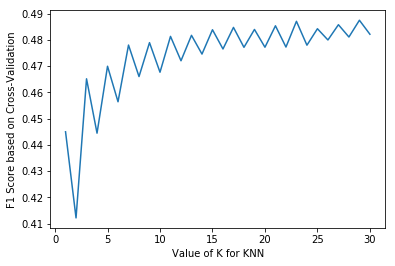

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('F1 Score based on Cross-Validation')
plt.show()

In [21]:
#from sklearn.model_selection import GridSearchCV

#k_range = list(range(1, 50))
#print(k_range)

#param_grid = dict(n_neighbors=k_range)
#print(param_grid)

#knn = KNeighborsClassifier(n_neighbors=1)

#grid = GridSearchCV(knn, param_grid, cv=10, scoring='f1_weighted')

#grid.fit(X, y)

In [ ]:
#means = grid.cv_results_['mean_test_score']
#cmeans

#grid.cv_results_['params']

#for mean, params in zip(means, grid.cv_results_['params']):
    #print(mean, params)

In [ ]:
# plot the results
#plt.plot(k_range, means)
#plt.xlabel('Value of K for KNN')
#plt.ylabel('F1 score based on Cross-Validation')
#plt.show()

In [ ]:
# identify the best model

#print(grid.best_score_)
#print(grid.best_params_)
#print(grid.best_estimator_)